# Test data

In [21]:
import os
import librosa
import pandas as pd
import numpy as np
import random
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
import pandas as pd

In [22]:
import warnings
warnings.filterwarnings('ignore')

### Transcript

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
%cd /content/drive/My Drive/DL Group Project/

/content/drive/.shortcut-targets-by-id/1tSW5aKfOxNnH1gavejL3H0w4Wrd4seAP/DL Group Project


In [25]:
features_path = "features.csv"
df = pd.read_csv(features_path)
df.head()

,clipname,transcript,group,word,tone,indicator,type,sentence,word_count,mfcc_1,...,spect_4,spect_5,spect_6,spect_7,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,tonnetz_6
0,IWTGH_1,I want to go home.,1,Neutral,Neutral,NaN,Statement,Single,18,-456.161011,...,12.345949,13.214580,16.673017,31.776100,0.028255,-0.018589,0.115786,-0.013089,-0.031850,-0.050886
1,IWTGH_2,I want to go home.,1,Neutral,Anger,NaN,Statement,Single,18,-403.748169,...,12.661829,13.684149,17.276580,33.785295,0.000486,0.028319,0.064798,-0.031453,0.001535,-0.017270
2,IWTGH_3,I want to go home.,1,Neutral,Disgust,NaN,Statement,Single,18,-455.887939,...,12.708105,13.574046,15.457117,33.037995,0.022056,-0.044555,0.114726,-0.004732,-0.040863,-0.023962
3,IWTGH_4,I want to go home.,1,Neutral,Fear,NaN,Statement,Single,18,-460.136444,...,12.829127,13.194763,17.238967,32.216306,0.008253,-0.017944,0.081751,-0.002341,-0.019149,-0.016467
4,IWTGH_5,I want to go home.,1,Neutral,Sad,NaN,Statement,Single,18,-432.942596,...,12.880225,13.129890,17.900985,31.293743,0.010412,-0.034611,0.111465,-0.056060,-0.061425,-0.031940


In [26]:
df.drop(columns=df.columns[5:], inplace=True)
df.head()
df.drop(df[(df['clipname'] == 'TBMBY_4') | (df['clipname'] == 'NTHIN_2')].index, inplace=True)

In [27]:
def get_correctLabel(row):
    if row['word'] == row['tone']:
        if row['tone'] == "Neutral":
            return 0
        elif row['tone'] == "Anger":
            return 1
        elif row['tone'] == "Disgust":
            return 2
        elif row['tone'] == "Fear":
            return 3
        elif row['tone'] == "Sad":
            return 4
        elif row['tone'] == "Happy":
            return 5

    elif row['word'] == 'Neutral':
        if row['tone'] == 'Neutral':
            return 0
        elif row['tone'] == 'Anger':
            return 1
        elif row['tone'] == 'Disgust':
            return 2
        elif row['tone'] == 'Fear':
            return 3
        elif row['tone'] == 'Sad':
            return 4
        elif row['tone'] == 'Happy':
            return 5

    elif row['tone'] == 'Neutral':
        if row['word'] == 'Neutral':
            return 0
        elif row['word'] == 'Anger':
            return 1
        elif row['word'] == 'Disgust':
            return 2
        elif row['word'] == 'Fear':
            return 3
        elif row['word'] == 'Sad':
            return 4
        elif row['word'] == 'Happy':
            return 5



In [28]:
df['label']=df.apply(get_correctLabel, axis=1)

In [29]:
def getMovieName(row):
    return row['clipname']+".wav"

df['movieName']=df.apply(getMovieName, axis=1)

In [30]:
df[0:20]

,clipname,transcript,group,word,tone,label,movieName
0,IWTGH_1,I want to go home.,1,Neutral,Neutral,0,IWTGH_1.wav
1,IWTGH_2,I want to go home.,1,Neutral,Anger,1,IWTGH_2.wav
2,IWTGH_3,I want to go home.,1,Neutral,Disgust,2,IWTGH_3.wav
3,IWTGH_4,I want to go home.,1,Neutral,Fear,3,IWTGH_4.wav
4,IWTGH_5,I want to go home.,1,Neutral,Sad,4,IWTGH_5.wav
5,IWTGH_6,I want to go home.,1,Neutral,Happy,5,IWTGH_6.wav
6,IWTGH_7,My work is done. I want to go home.,2,Neutral,Neutral,0,IWTGH_7.wav
7,IWTGH_8,This treament is outrageous. I want to go home,2,Anger,Neutral,1,IWTGH_8.wav
8,IWTGH_9,Our motel is dirty. I want to go home.,2,Disgust,Neutral,2,IWTGH_9.wav
9,IWTGH_10,This storm looks terrifying. I want to go home.,2,Fear,Neutral,3,IWTGH_10.wav


In [31]:
df_1 = df[df['group'] == 1]
df_2 = df[df['group'] == 2]
df_3 = df[df['group'] == 3]

In [32]:
len(df_1), len(df_2), len(df_3)
df.head()

,clipname,transcript,group,word,tone,label,movieName
0,IWTGH_1,I want to go home.,1,Neutral,Neutral,0,IWTGH_1.wav
1,IWTGH_2,I want to go home.,1,Neutral,Anger,1,IWTGH_2.wav
2,IWTGH_3,I want to go home.,1,Neutral,Disgust,2,IWTGH_3.wav
3,IWTGH_4,I want to go home.,1,Neutral,Fear,3,IWTGH_4.wav
4,IWTGH_5,I want to go home.,1,Neutral,Sad,4,IWTGH_5.wav


In [33]:
# HuggingFace Transformers modules
from transformers import (
    Wav2Vec2Model, Wav2Vec2FeatureExtractor,
    AutoTokenizer, AutoModelForSequenceClassification,
    AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
)

# Set seeds for reproducibility
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [34]:
class wav2Vec_transferModel(nn.Module):
    def __init__(self, pretrained_model_name="r-f/wav2vec-english-speech-emotion-recognition"):
        super().__init__()
        self.model = Wav2Vec2Model.from_pretrained(pretrained_model_name)
        for param in self.model.parameters():
            param.requires_grad = False
        self.dropout = nn.Dropout(0.2)

        # Match exactly what was saved
        self.classifier_emo = nn.Sequential(
            nn.Linear(self.model.config.hidden_size, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            self.dropout,
            nn.Linear(32, 6)
        )

    def forward(self, inputs):
        input_values = inputs['input_values']
        attention_mask = inputs['attention_mask']
        with torch.no_grad():
            outputs = self.model(input_values=input_values, attention_mask=attention_mask)
            pooled = outputs.last_hidden_state.mean(1)
        logits = self.classifier_emo(pooled)
        return logits

# Combined audio and text

In [35]:
import torch.nn.functional as F


class emotionDetectionSystem():
    def __init__(self, useAudio=True, useText=True):
        self.useAudio = useAudio
        self.useText = useText
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

        # Load Wav2Vec2 model for audio emotion recognition
        if self.useAudio:
            self.wav2vec_modelName = "r-f/wav2vec-english-speech-emotion-recognition"
            self.wav2vec_model = wav2Vec_transferModel()
            self.wav2vec_model.load_state_dict(torch.load("bestWav2Vec_balanced.pth", map_location=self.device), strict=False)
            self.wav2vec_model.eval()
            self.wav2vec_model.to(self.device)
            self.audio_feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(self.wav2vec_modelName)

        # Load BERT-based text emotion classifier and Whisper transcription model
        if self.useText:
            self.textClassifier_model_name = "michellejieli/emotion_text_classifier"
            self.tokenizer = AutoTokenizer.from_pretrained(self.textClassifier_model_name)
            self.textModel = AutoModelForSequenceClassification.from_pretrained(self.textClassifier_model_name)
            self.textModel.to(self.device)
            self.textModel.eval()

            self.transcriptModel_id = "openai/whisper-large-v3-turbo"
            self.torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

            self.transcriptModel = AutoModelForSpeechSeq2Seq.from_pretrained(
                self.transcriptModel_id,
                torch_dtype=self.torch_dtype,
                low_cpu_mem_usage=True,
                use_safetensors=True
            ).to(self.device)

            self.transcriptProcessor = AutoProcessor.from_pretrained(self.transcriptModel_id)

            self.transcriptPipe = pipeline(
                "automatic-speech-recognition",
                model=self.transcriptModel,
                tokenizer=self.transcriptProcessor.tokenizer,
                feature_extractor=self.transcriptProcessor.feature_extractor,
                torch_dtype=self.torch_dtype,
                device=0 if self.device == "cuda" else -1,
            )

    def predict(self, audio_path=None):
        # Load and preprocess audio to 16kHz
        audio, sr = librosa.load(audio_path, sr=16000)

        # Convert to torch tensor and fix shape
        audio_tensor = torch.tensor(audio)
        if audio_tensor.ndim == 1:
            audio_tensor = audio_tensor.unsqueeze(0)  # [time] → [1, time]
        elif audio_tensor.ndim > 2:
            audio_tensor = audio_tensor.squeeze()

        # Audio-based prediction
        if self.useAudio:
            audioInput = self.audio_feature_extractor(
                audio_tensor.squeeze().numpy(), sampling_rate=16000, return_tensors="pt"
            ).to(self.device)

            with torch.no_grad():
                audio_logits = self.wav2vec_model(audioInput)
                audio_probs = F.softmax(audio_logits, dim=1)[0]

        # Text-based prediction via Whisper
        if self.useText:
            transcript = self.transcriptPipe(audio_path,generate_kwargs={"language": "en"})["text"]
            inputs = self.tokenizer(transcript, return_tensors="pt", padding=True, truncation=True).to(self.device)

            with torch.no_grad():
                text_logits = self.textModel(**inputs).logits
                text_probs_raw = F.softmax(text_logits, dim=1)[0]

                text_probs = torch.tensor([
                    text_probs_raw[4],                   # Neutral
                    text_probs_raw[0],                   # Anger
                    text_probs_raw[1],                   # Disgust
                    text_probs_raw[2] + text_probs_raw[6],  # Fear + Surprise
                    text_probs_raw[5],                   # Sadness
                    text_probs_raw[3],                   # Happiness
                ], device=self.device)

        # Combine or return available predictions
        if self.useAudio and self.useText:
            emo_probs = (audio_probs + text_probs) / 2
        elif self.useAudio:
            emo_probs = audio_probs
        elif self.useText:
            emo_probs = text_probs
        else:
            raise ValueError("At least one of useAudio or useText must be True.")

        emoList = ["Neutral", "Anger", "Disgust", "Fear", "Sadness", "Happiness"]
        emo_pred = torch.argmax(emo_probs).item()

        # print(f"\nPredicted Emotion: {emo_pred}")
        # print("\nEmotion Probabilities:")
        # for i, prob in enumerate(emo_probs):
            # print(f"{emoList[i]}: {prob.item():.4f}")

        return emo_pred

## Architect

Data loader

In [36]:
# split groups for testing
group1_df = df[df['group'] == 1]
group2_df = df[df['group'] == 2]
group3_df = df[df['group'] == 3]

Initialize systems

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def testSystem(system, df, systemType, groupName):
    predictions = []
    for _, row in df.iterrows():
        audio_path = 'audio/' + row['movieName']
        pred = system.predict(audio_path)
        predictions.append(pred)

    target = df['label'].tolist()

    cm_emo = confusion_matrix(target, predictions)
    emo_label = ["Neutral", "Anger", "Disgust", "Fear", "Sadness", "Happiness"]

    # Create figure and axis
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(cm_emo, annot=True, fmt='d', cmap='Reds',
                     xticklabels=emo_label, yticklabels=emo_label)
    ax.set_title(f'{groupName} by {systemType}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    plt.tight_layout()
    plt.show()

    # Calculate accuracy
    accuracy = np.trace(cm_emo) / np.sum(cm_emo)
    print(f"Accuracy for {groupName} by {systemType}: {accuracy:.4f}")
    return


Device set to use cuda:0


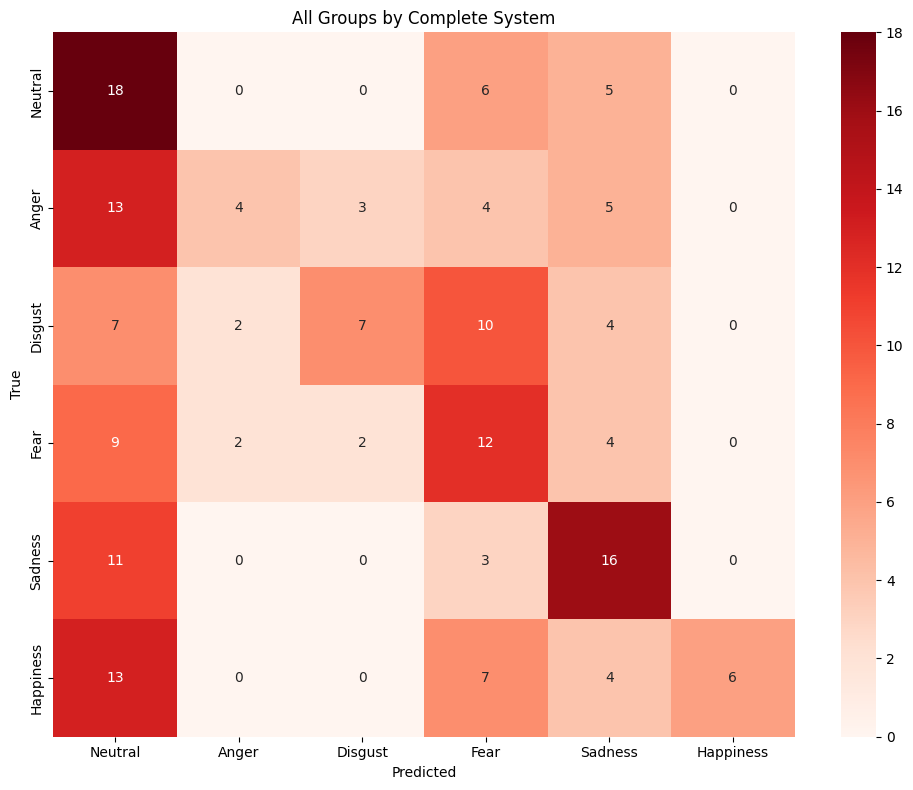

Accuracy for All Groups by Complete System: 0.3559


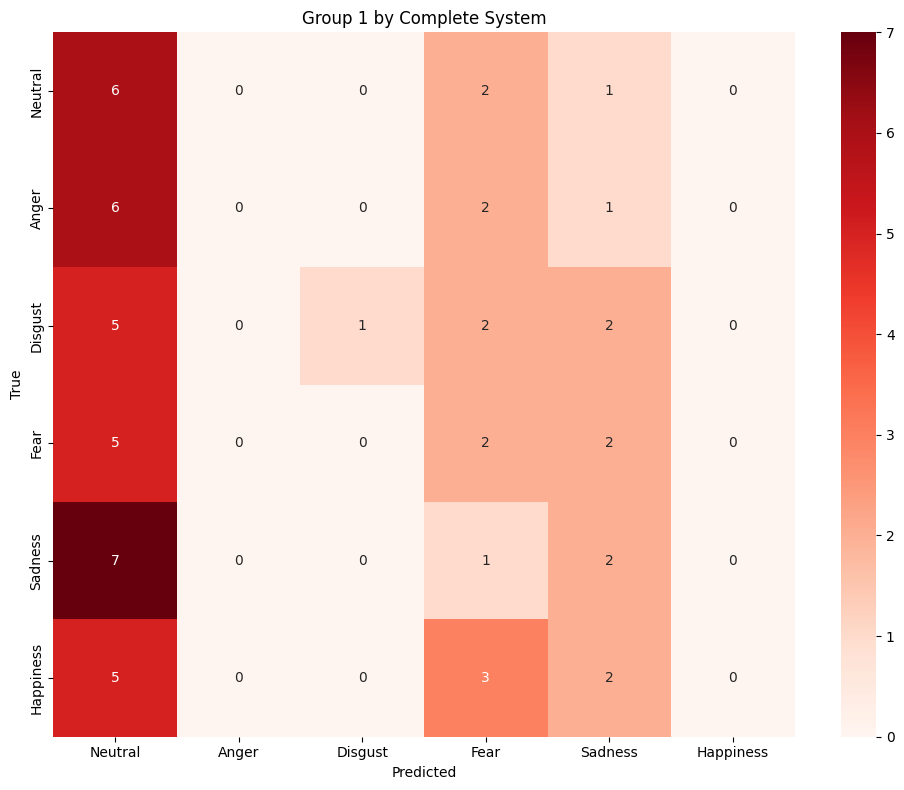

Accuracy for Group 1 by Complete System: 0.1930


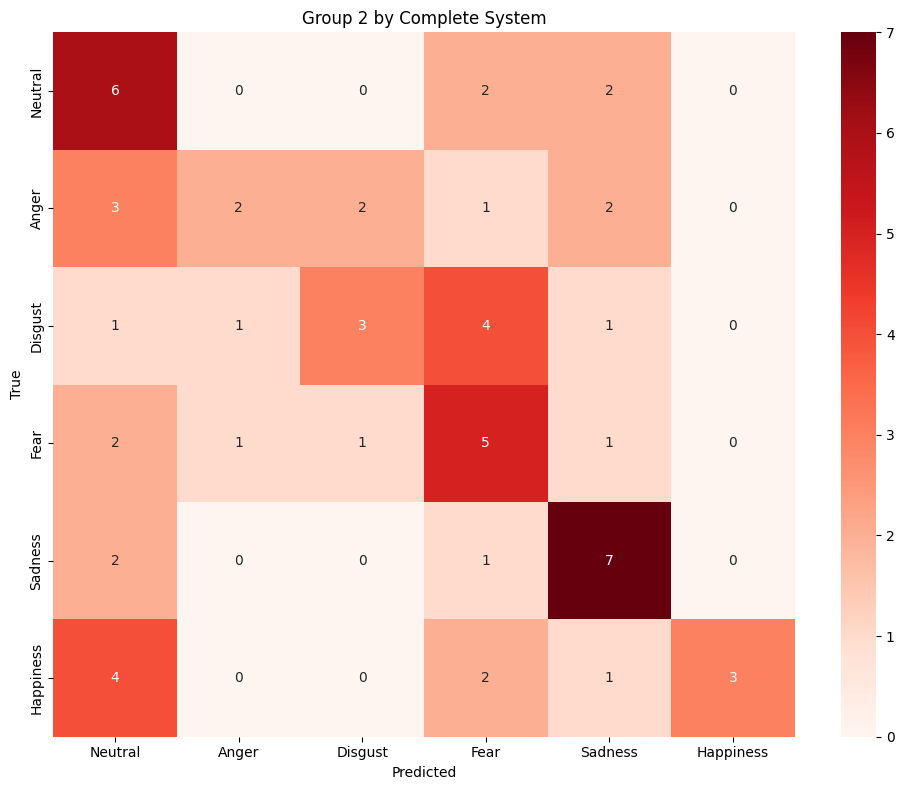

Accuracy for Group 2 by Complete System: 0.4333


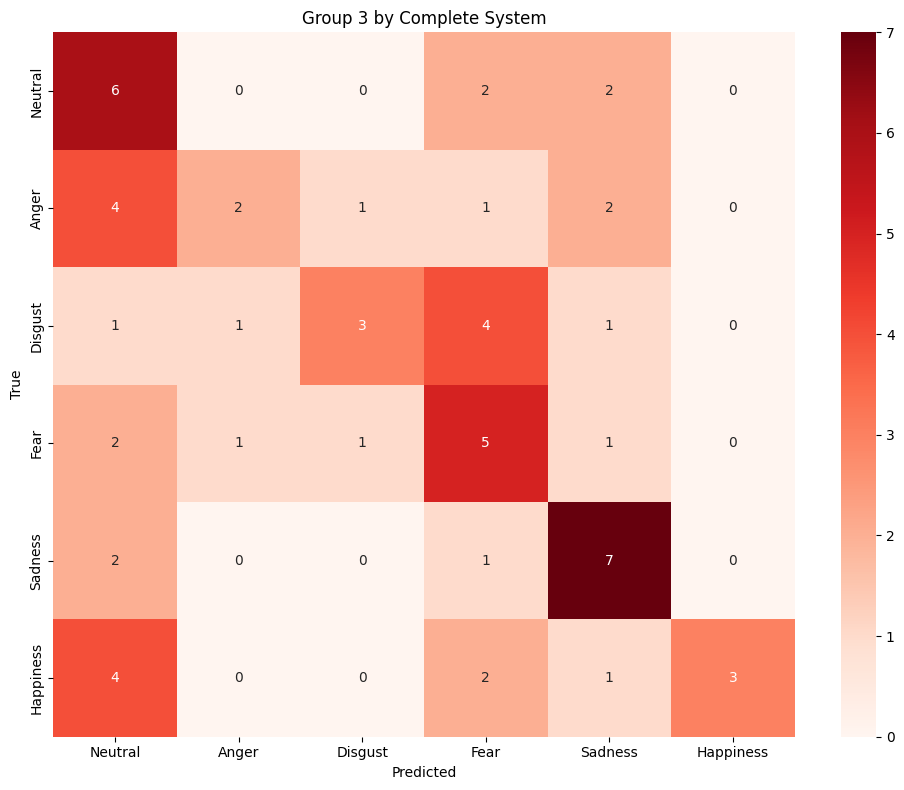

Accuracy for Group 3 by Complete System: 0.4333


In [38]:
completeSystem = emotionDetectionSystem(useAudio=True, useText=True)
#Test on all
testSystem(completeSystem, df, "Complete System", "All Groups")
# Test on group 1
testSystem(completeSystem, group1_df, "Complete System", "Group 1")
# Test on group 2
testSystem(completeSystem, group2_df, "Complete System", "Group 2")
# Test on group 3
testSystem(completeSystem, group3_df, "Complete System", "Group 3")

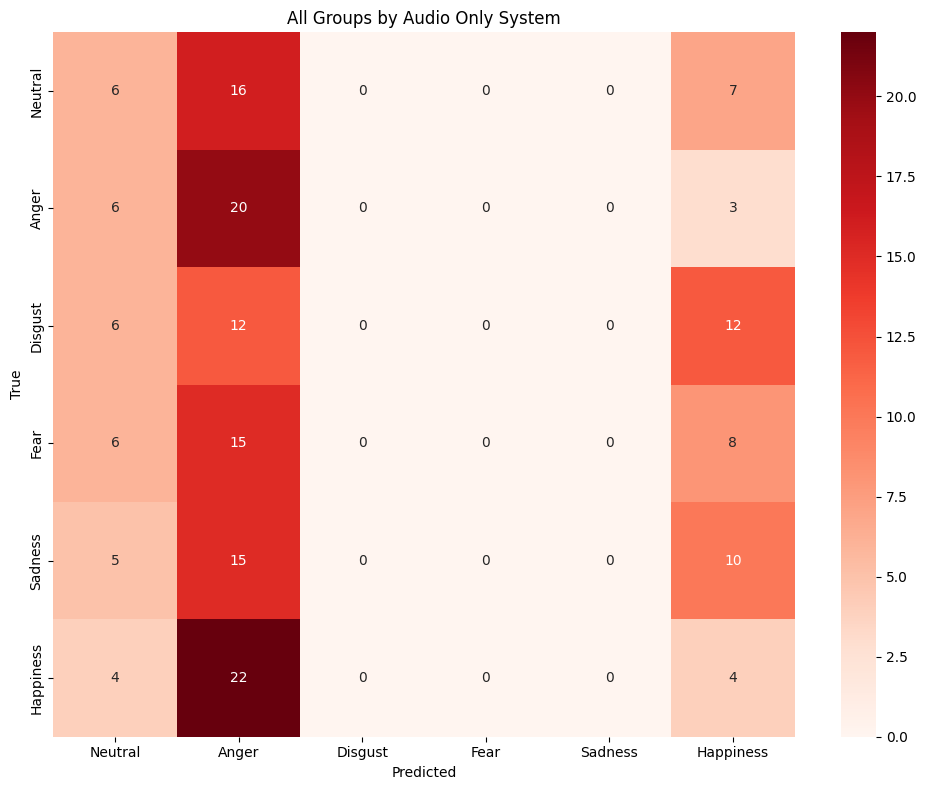

Accuracy for All Groups by Audio Only System: 0.1695


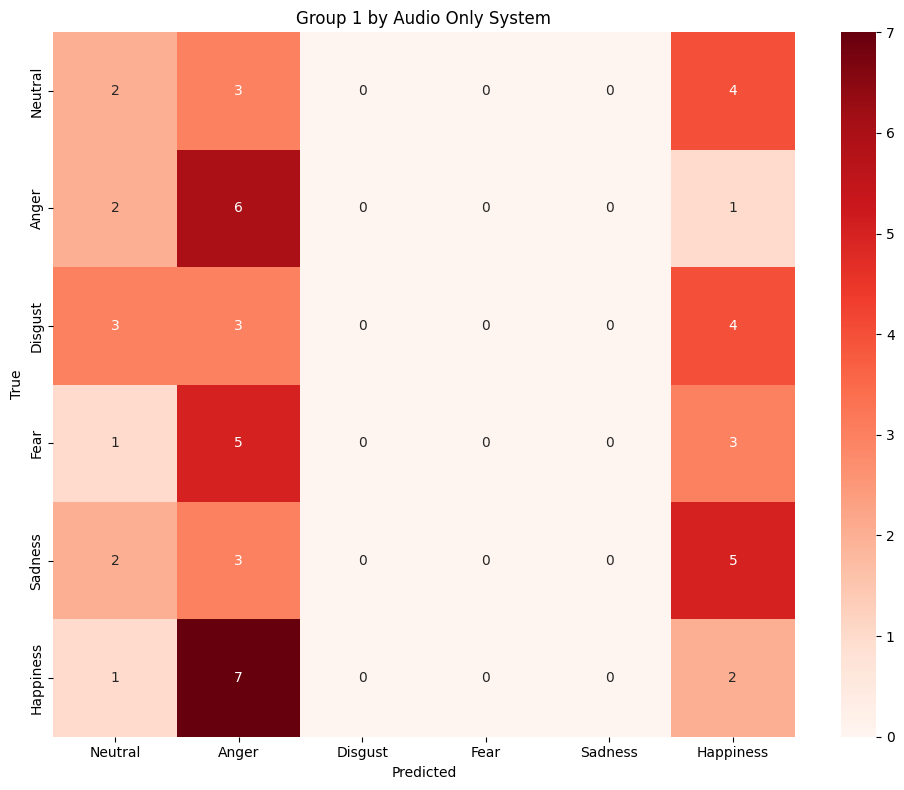

Accuracy for Group 1 by Audio Only System: 0.1754


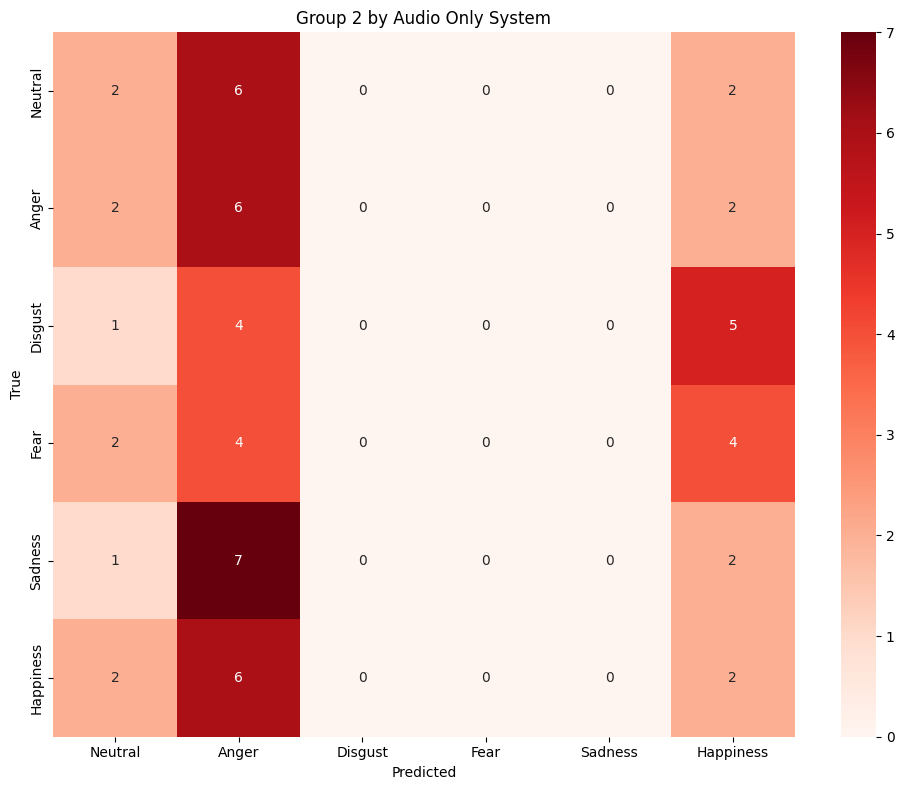

Accuracy for Group 2 by Audio Only System: 0.1667


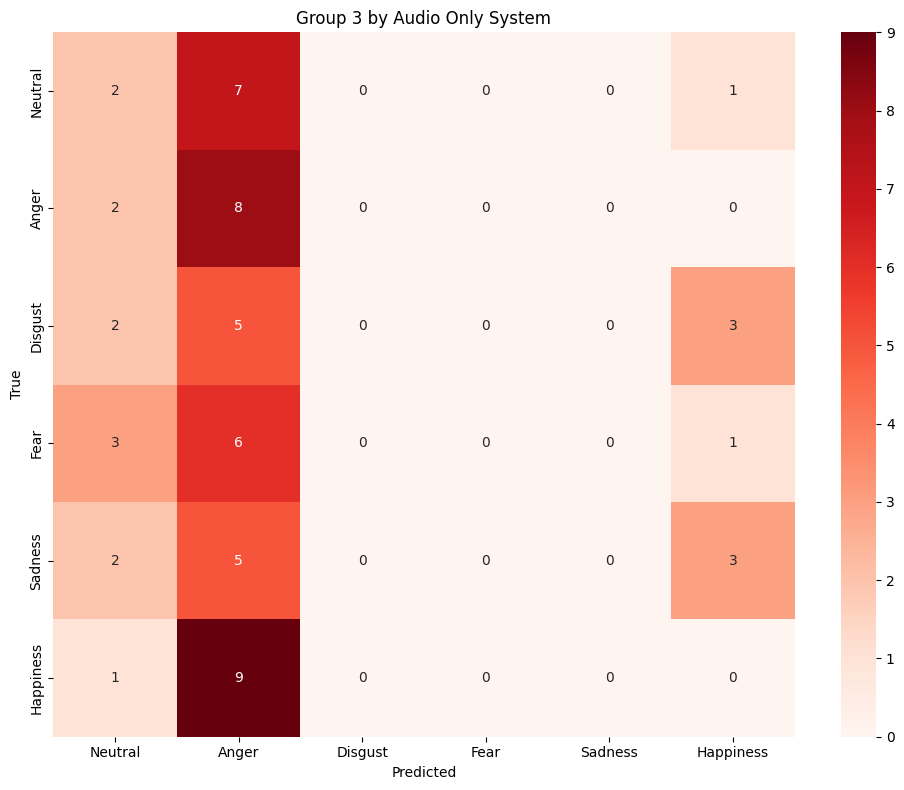

Accuracy for Group 3 by Audio Only System: 0.1667


In [39]:
audioSystem = emotionDetectionSystem(useAudio=True, useText=False)
#Test on all
testSystem(audioSystem, df, "Audio Only System", "All Groups")
# Test on group 1
testSystem(audioSystem, group1_df, "Audio Only System", "Group 1")
# Test on group 2
testSystem(audioSystem, group2_df, "Audio Only System", "Group 2")
# Test on group 3
testSystem(audioSystem, group3_df, "Audio Only System", "Group 3")

Device set to use cuda:0


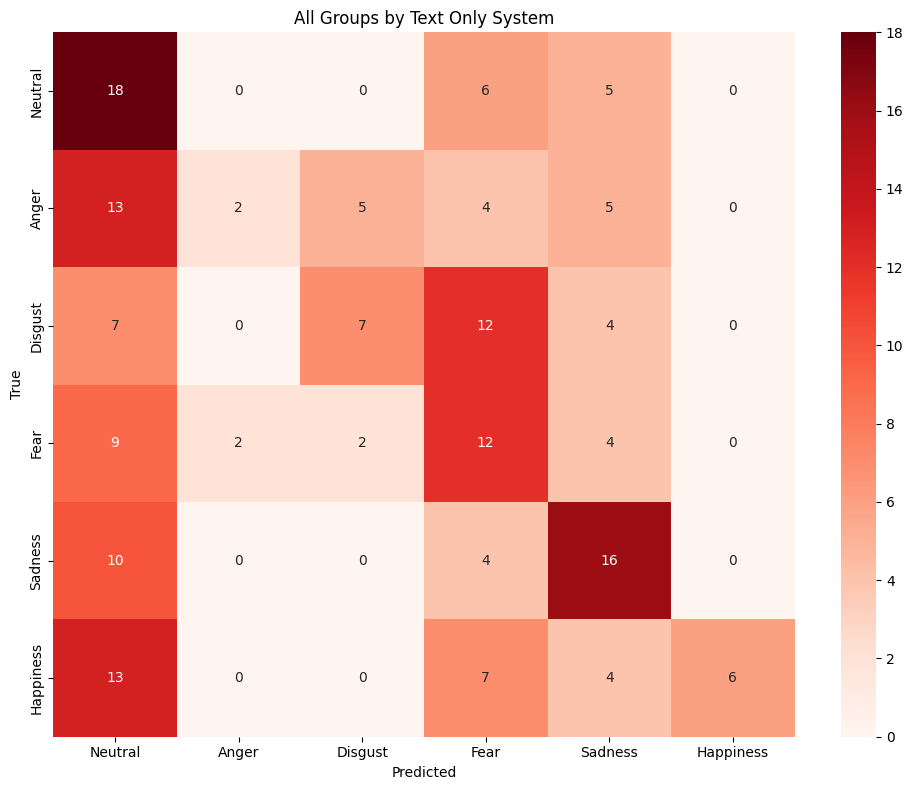

Accuracy for All Groups by Text Only System: 0.3446


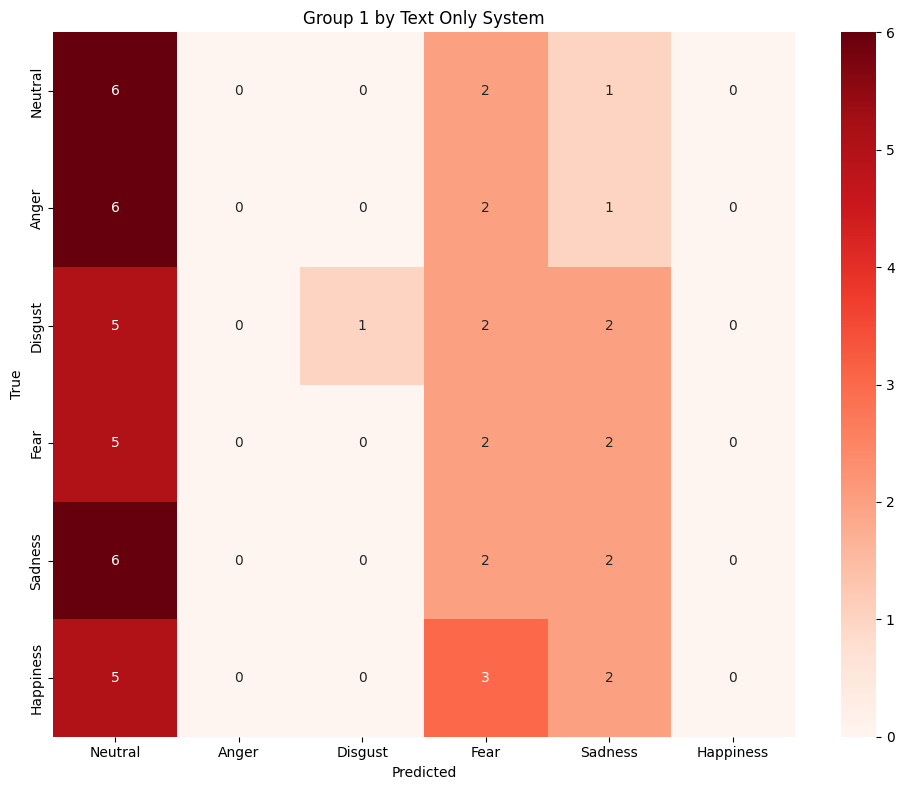

Accuracy for Group 1 by Text Only System: 0.1930


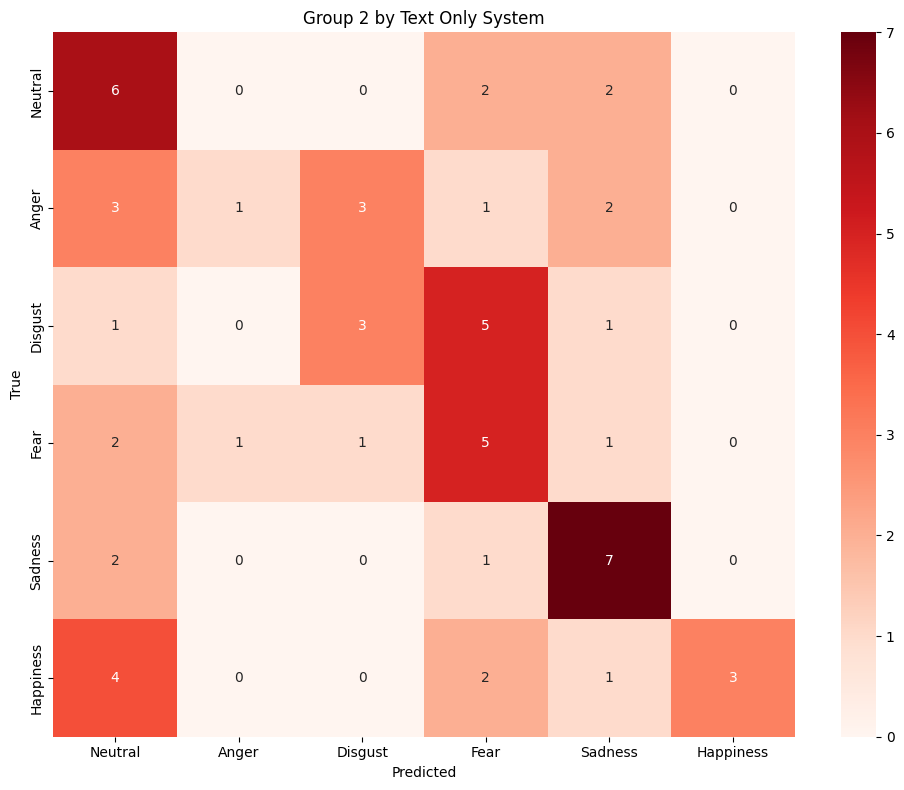

Accuracy for Group 2 by Text Only System: 0.4167


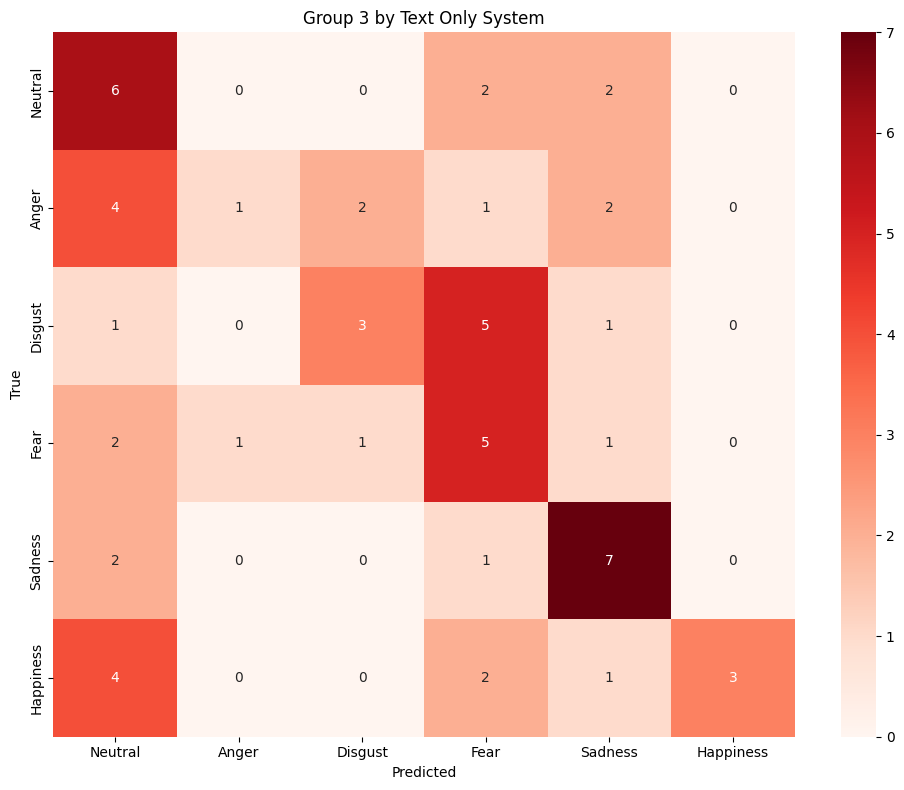

Accuracy for Group 3 by Text Only System: 0.4167


In [40]:
textSystem = emotionDetectionSystem(useAudio=False, useText=True)
#Test on all
testSystem(textSystem, df, "Text Only System", "All Groups")
# Test on group 1
testSystem(textSystem, group1_df, "Text Only System", "Group 1")
# Test on group 2
testSystem(textSystem, group2_df, "Text Only System", "Group 2")
# Test on group 3
testSystem(textSystem, group3_df, "Text Only System", "Group 3")